In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import io
#ruta = io.StringIO(uploaded['train.csv'].decode('utf-8'))
df = pd.read_csv('data/train.csv', dtype = {'piscina':'int32', 'gimnasio':'int32', 'usosmultiples':'int32', 'escuelascercanas':'int32',
                                         'centroscomercialescercanos':'int32', 'precio':'int32', 'id':'int32'},parse_dates = ['fecha'])

In [3]:
df.head(1)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23,0,0,0,0,0,2273000


In [4]:
# me quedo con los datos originales para no afectar los datos de columnas con 0s y 1s
data = df
#Quito todos los NaN y los pasa a valor 0
df = df.replace(np.nan, 0)

In [5]:
#Continuar casteando valores que ocupan demasiada memoria (ahora puedo hacerlo en aquellos que tenian NaN)
df = df.astype({'banos':'int32', 'antiguedad':'int32', 'garages':'int32', 'habitaciones':'int32', 'metroscubiertos':'int32', 'metrostotales':'int32',
                    'idzona':'int32'})

In [6]:
#Establecer como category el tipo de propiedad
categorias = df['tipodepropiedad']
categorias = categorias.astype('category').dtypes
df = df.astype({'tipodepropiedad':'category'})

# Análisis sobre los precios

## Análisis según tipo de propiedad

In [7]:
#Analizo los tipos de propiedades
df['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
0                                    46
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1


In [8]:
result = df.groupby(["tipodepropiedad"])['precio'].aggregate(np.median).reset_index().sort_values('precio')

In [9]:
result = result.drop([0],axis=0) #Elimino los tipos 0 que desconozco que clase de propiedad son (NO me sirven para comparar porque puede ser cualquier cosa)

Text(0,0.5,'Tipo de Propiedad')

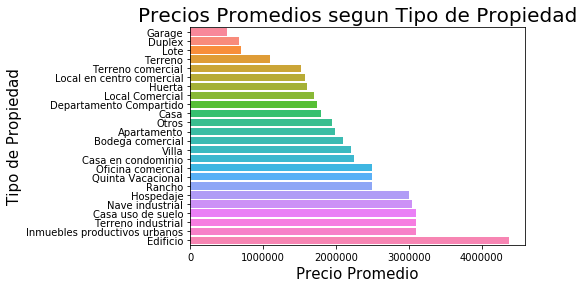

In [10]:
g = sns.barplot( x='precio', y= 'tipodepropiedad', data = result, order=result['tipodepropiedad'], orient = 'h',saturation = 1000)
g.set_title("Precios Promedios segun Tipo de Propiedad", fontsize=20)
g.set_xlabel("Precio Promedio", fontsize=15)
g.set_ylabel("Tipo de Propiedad", fontsize=15)

## Precios de propiedades según la popularidad de las provincias y tipos de propiedades

In [11]:
# Veo cuales son las propiedades más populares
propiedadesXtipos = df.tipodepropiedad.value_counts().nlargest(10)
propiedadesXtipos

Casa                  141717
Apartamento            57341
Casa en condominio     19297
Terreno                 9945
Local Comercial         3055
Oficina comercial       1741
Bodega comercial        1406
Edificio                1396
Terreno comercial       1326
Casa uso de suelo        708
Name: tipodepropiedad, dtype: int64

In [12]:
tipos_populares = propiedadesXtipos.index
tipos_populares

CategoricalIndex(['Casa', 'Apartamento', 'Casa en condominio', 'Terreno',
                  'Local Comercial', 'Oficina comercial', 'Bodega comercial',
                  'Edificio', 'Terreno comercial', 'Casa uso de suelo'],
                 categories=[0, 'Apartamento', 'Bodega comercial', 'Casa', 'Casa en condominio', 'Casa uso de suelo', 'Departamento Compartido', 'Duplex', ...], ordered=False, dtype='category')

In [13]:
#Provincias más populares
popiedadesXprovincia = df.provincia.value_counts().nlargest(10)
popiedadesXprovincia

Distrito Federal    58790
Edo. de México      41607
Jalisco             21238
Querétaro           16988
Nuevo León          15324
Puebla              10421
San luis Potosí      8447
Yucatán              7928
Morelos              7337
Veracruz             5762
Name: provincia, dtype: int64

In [14]:
provincias_populares = popiedadesXprovincia.index
provincias_populares

Index(['Distrito Federal', 'Edo. de México', 'Jalisco', 'Querétaro',
       'Nuevo León', 'Puebla', 'San luis Potosí', 'Yucatán', 'Morelos',
       'Veracruz'],
      dtype='object')

In [15]:
#Tipo de propiedad vs precios promedios
tipoVSprecio = df[['id', 'tipodepropiedad', 'precio', 'provincia']].groupby(['provincia', 'tipodepropiedad']).agg({'id': 'count', 'precio': 'mean'}).reset_index().sort_values(by = ['id'], ascending = False)
#Tomo sólo los 10 tipos de propiedad y provincias más populares
tipoVSprecio_mas = tipoVSprecio.loc[(tipoVSprecio.provincia.isin(provincias_populares)) & (tipoVSprecio.tipodepropiedad.isin(tipos_populares))]

In [16]:
tipoVSprecio_mas.head()

,provincia,tipodepropiedad,id,precio
129,Distrito Federal,Apartamento,33839,2.919084e+06
173,Edo. de México,Casa,25938,2.792133e+06
131,Distrito Federal,Casa,15812,4.037017e+06
247,Jalisco,Casa,14196,2.325363e+06
314,Nuevo León,Casa,11477,2.568358e+06


In [17]:
tipoVSprecio_mas.provincia.nunique()

10

In [18]:
tipoVSprecio_mas.tipodepropiedad.nunique()

10

In [19]:
tablaHeatMap = pd.pivot_table(tipoVSprecio_mas, values = 'precio', index = 'tipodepropiedad', columns = 'provincia')
tablaHeatMap


provincia,Distrito Federal,Edo. de México,Jalisco,Morelos,Nuevo León,Puebla,Querétaro,San luis Potosí,Veracruz,Yucatán
tipodepropiedad,,,,,,,,,,
Apartamento,2.919084e+06,2.881501e+06,2.520902e+06,1.574236e+06,3.860282e+06,1.860751e+06,1.945329e+06,1.671470e+06,1.940036e+06,2.336429e+06
Bodega comercial,4.272932e+06,2.749083e+06,2.310573e+06,2.480000e+06,2.233120e+06,2.482700e+06,2.013162e+06,2.001956e+06,1.856329e+06,1.541557e+06
Casa,4.037017e+06,2.792133e+06,2.325363e+06,2.595663e+06,2.568358e+06,2.391779e+06,2.309959e+06,2.032427e+06,1.921550e+06,1.992796e+06
Casa en condominio,4.811713e+06,2.484096e+06,2.627604e+06,1.801653e+06,2.701284e+06,2.692794e+06,2.120155e+06,2.266716e+06,1.488363e+06,2.633705e+06
Casa uso de suelo,5.321922e+06,3.135521e+06,2.729746e+06,3.292401e+06,2.585438e+06,2.668182e+06,3.235852e+06,2.444000e+06,3.675000e+06,2.488077e+06
Edificio,5.951535e+06,4.820201e+06,4.911477e+06,3.938667e+06,3.617602e+06,4.947077e+06,4.353530e+06,5.465400e+06,3.963292e+06,3.272906e+06
Local Comercial,3.178273e+06,2.764283e+06,2.349532e+06,2.512158e+06,2.440365e+06,2.293458e+06,1.898338e+06,2.032394e+06,2.521488e+06,2.081840e+06
Oficina comercial,3.647538e+06,3.334818e+06,3.837927e+06,2.064219e+06,3.231270e+06,2.708164e+06,2.277341e+06,1.888526e+06,2.696753e+06,1.945090e+06
Terreno,4.066719e+06,1.871082e+06,1.766575e+06,1.477136e+06,1.841704e+06,1.330743e+06,8.709473e+05,1.360701e+06,1.066838e+06,1.280037e+06


Text(0.5,36.5,'Provincia')

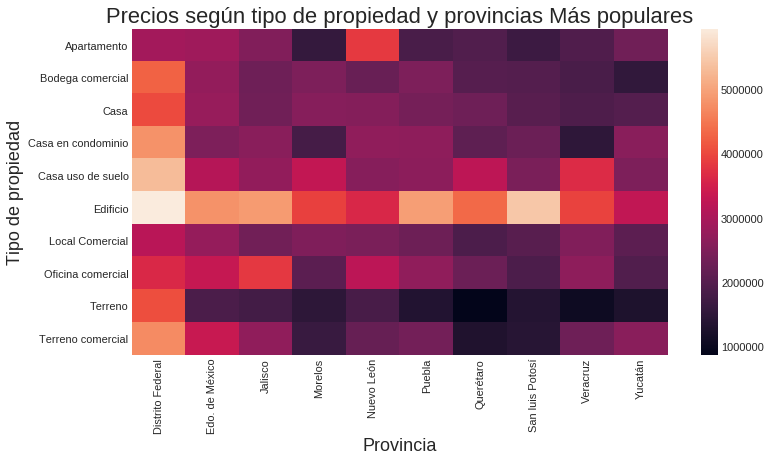

In [92]:
plt.figure(figsize = (12,6))
graf = sns.heatmap(tablaHeatMap)
graf.set_title('Precios según tipo de propiedad y provincias Más populares', fontsize =  22)
graf.set_ylabel('Tipo de propiedad', fontsize = 18)
graf.set_xlabel('Provincia', fontsize = 18)


## ¿Cómo se distribuye el precio en las ciudades más populares?

In [21]:
ciudades_populares = df.ciudad.value_counts().head(20).index
ciudades_populares

Index(['Querétaro', 'Benito Juárez', 'Zapopan', 'San Luis Potosí', 'Mérida',
       'Monterrey', 'Alvaro Obregón', 'Cuauhtémoc', 'Naucalpan de Juárez',
       'Miguel Hidalgo', 'Atizapán de Zaragoza', 'Tlalpan', 'Huixquilucan',
       'Coyoacán', 'Puebla', 'Guadalajara', 'San Andrés Cholula', 'Cancún',
       'Cuernavaca', 'Chihuahua'],
      dtype='object')

In [22]:
precios_ciudades_pop = df.loc[df.ciudad.isin(ciudades_populares), ['precio', 'ciudad']]
precios_ciudades_pop.head()

,precio,ciudad
0,2273000,Benito Juárez
4,1150000,Zapopan
5,1100000,Coyoacán
10,488000,San Luis Potosí
12,1500000,Querétaro


(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000., 14000000.]),
 <a list of 9 Text yticklabel objects>)

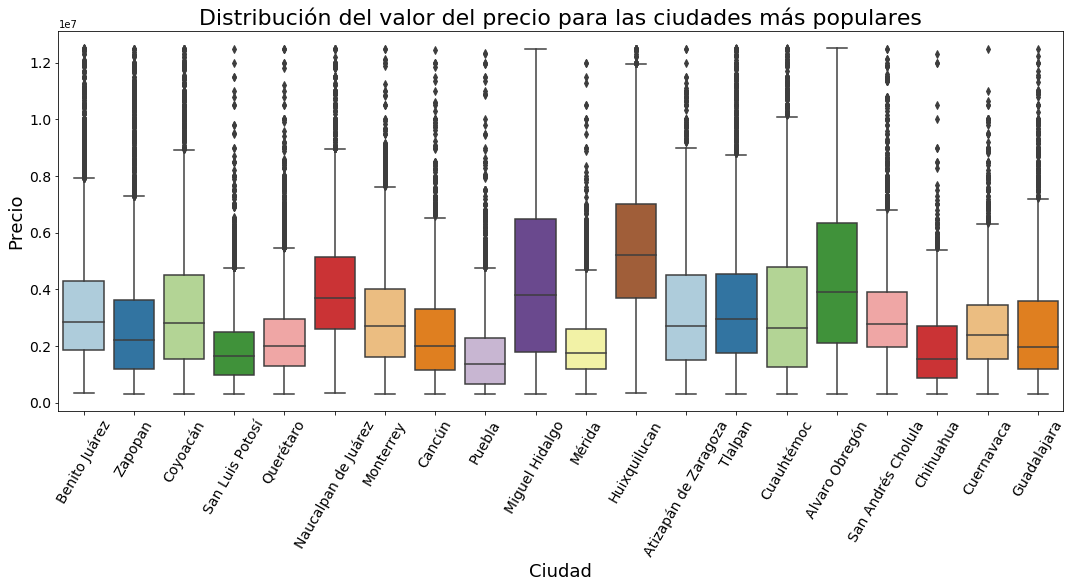

In [23]:
plt.figure(figsize = (18,7))
grafico = sns.boxplot( x=precios_ciudades_pop["ciudad"], y=precios_ciudades_pop["precio"], palette="Paired")
grafico.set_xticklabels(grafico.get_xticklabels(),rotation=60)
grafico.set_title('Distribución del valor del precio para las ciudades más populares', fontsize =  22)
grafico.set_ylabel('Precio', fontsize = 18)
grafico.set_xlabel('Ciudad', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## ¿Qué pasa con el precio según las características de las casas?

In [24]:
data_con_caracteristicas = data.dropna().iloc[:, [0,17,18,19,20,21,22]]
data_con_caracteristicas = data_con_caracteristicas.melt(id_vars = ['id', 'precio'], value_vars = ['gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos'], var_name = 'caracteristica', value_name = 'si/no')
data_con_caracteristicas.head()

,id,precio,caracteristica,si/no
0,53461,3600000,gimnasio,0
1,209067,650000,gimnasio,0
2,126147,1100000,gimnasio,0
3,5013,4200000,gimnasio,0
4,47890,1500000,gimnasio,0


In [25]:
data_con_caracteristicas['si/no'].value_counts()

0    171753
1     77652
Name: si/no, dtype: int64

In [26]:
data_con_caracteristicas = data_con_caracteristicas.loc[data_con_caracteristicas['si/no'] != 0]
data_con_caracteristicas.head()

,id,precio,caracteristica,si/no
10,171944,3500000,gimnasio,1
26,246928,2450000,gimnasio,1
32,4822,3100000,gimnasio,1
61,43801,1250000,gimnasio,1
83,9893,4300000,gimnasio,1


In [27]:
data_con_caracteristicas.groupby('caracteristica').agg({'id':'count', 'precio':'mean'})

,id,precio
caracteristica,,
centroscomercialescercanos,31948,2.272573e+06
escuelascercanas,33486,2.219112e+06
gimnasio,3494,3.731120e+06
piscina,4728,3.130244e+06
usosmultiples,3996,3.345267e+06


In [28]:
data_con_caracteristicas['cantidad'] = data_con_caracteristicas[['precio', 'caracteristica', 'si/no']].groupby(['precio', 'caracteristica']).transform(lambda x: x.sum())
data_con_caracteristicas

,id,precio,caracteristica,si/no,cantidad
10,171944,3500000,gimnasio,1,44
26,246928,2450000,gimnasio,1,21
32,4822,3100000,gimnasio,1,30
61,43801,1250000,gimnasio,1,19
83,9893,4300000,gimnasio,1,23
91,176707,3500000,gimnasio,1,44
96,124699,680000,gimnasio,1,3
98,107307,2980000,gimnasio,1,6
143,114384,5600000,gimnasio,1,15
153,208808,3450000,gimnasio,1,19


In [29]:
data_con_caracteristicas.caracteristica.unique()

array(['gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos'], dtype=object)

Text(0,0.5,'Cantidad de Publicaciones')

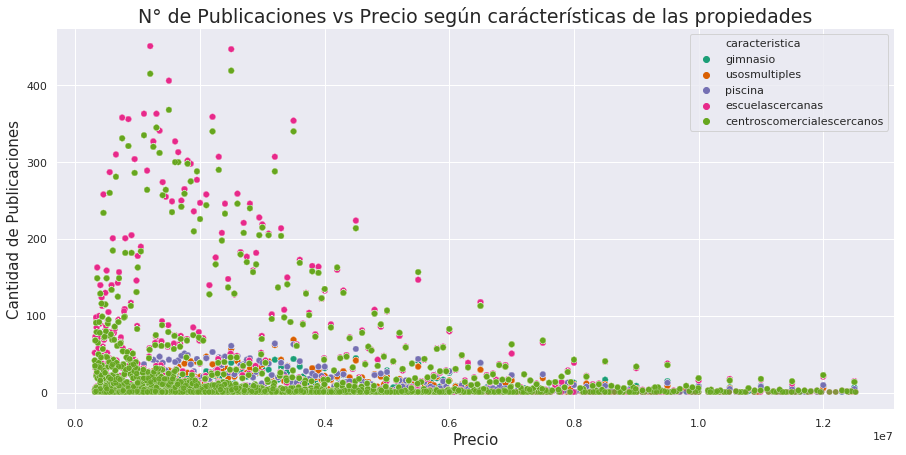

In [30]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 7))
sns.despine(f, left=True, bottom=True)
g = sns.scatterplot(x="precio", y="cantidad",
                hue="caracteristica",
                palette="Dark2", linewidth=0.25,
                data=data_con_caracteristicas, ax=ax, alpha = 0.75)
g.set_title('N° de Publicaciones vs Precio según carácterísticas de las propiedades', fontsize = 19)
g.set_xlabel('Precio', fontsize = 15)
g.set_ylabel('Cantidad de Publicaciones', fontsize = 15)

Vemos como las propiedades con centros comerciales cercanos y con escuelas cercanas tienen un comportamiento bastante parecido, esto también se debe a que sean las más populares, pero además son cualidades importantes a la hora de decidir sobre la adquisición de una propiedad.
Vemos que hay una poca cantidad de publicaciones con precios super variados, desde bajos hasta muy altos, pero a medida que la cantidad de publicaciones aumenta el precio comienza a disminuir, por lo que parecen ser mucho más populares las publicaciones de propiedades que posean éstas características y se encuentren a un precio relativamente bajo.

## Comparo con respecto otras características

## Antiguedad

(uso la data original sin modificar los NaN)

In [37]:
data.antiguedad.min()

0.0

In [38]:
data.antiguedad.max()

80.0

In [45]:
precio_antiguedad = data[['precio', 'antiguedad', 'id']].loc[~(df.antiguedad.isnull())].groupby('antiguedad').agg({'precio': 'mean', 'id':'count'}).reset_index()
precio_antiguedad.head()

,antiguedad,precio,id
0,0.0,2.478479e+06,50335
1,1.0,2.635363e+06,12353
2,2.0,2.790816e+06,5059
3,3.0,2.616413e+06,5616
4,4.0,2.562077e+06,7944


In [46]:
#Voy a filtrar las antiguedades que contengan menos de 100 publicaciones, así evitamos a la "ecuación más peligros del mundo"
precio_antiguedad = precio_antiguedad.loc[precio_antiguedad.id >= 100]

Text(0.5,1,'Precio Vs Antiguedad de las propiedades')

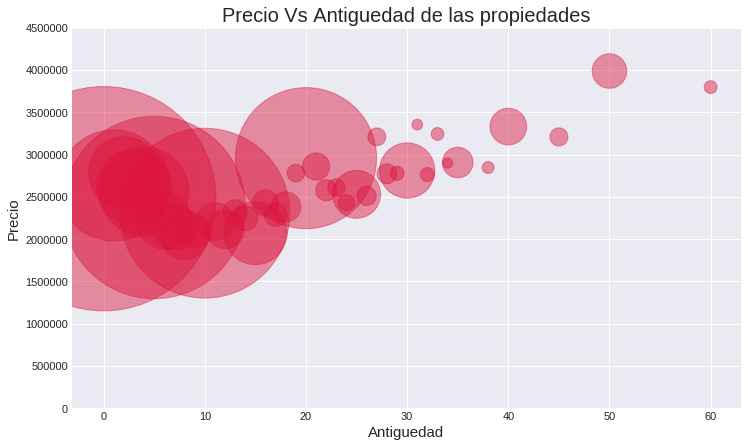

In [61]:
plt.figure(figsize = (12,7))
plt.style.use('seaborn-darkgrid')
plt.scatter(precio_antiguedad['antiguedad'], precio_antiguedad['precio'], s = precio_antiguedad['id'], color = 'crimson', alpha = 0.45)
plt.xlabel('Antiguedad', fontsize = 15)
plt.ylabel('Precio', fontsize = 15)
plt.yticks(range(0,5000000, 500000))
plt.title('Precio Vs Antiguedad de las propiedades', fontsize = 20)

Vemos como las propiedades con una antiguedad entre 0 y 10 años tienen una grán cantidad de publicaciones registradas y precios mucho más variables que se encuentran por debajo de los 4 millones de pesos mexicanos, aunque si observamos bien, tenemos un aglutinamiento de propiedades que se encuentran por debajo de los 20 años de antiguedad, cuyo precio escala sólo un poco por encima de los 3 millones. Luego si nos movemos a propiedades que se encuentran entre los 15 años hasta casi los 30 años de antiguedad, el precio varía un poco menos, pues son menos publicaciones y se encuentran entre un rango de 2 a 3.5 millones de pesos mexicacnos.
Por ultimo observamos como a medida que se superan los 30 años de antiguedad el precio va en aumento, vemos que hay ciertas propiedades rondando los 50 años de antiguedad y que son bastante costosas, así tambien vemos que el número de publicaciones disminuye, por lo que las casas con mayor antiguedad son menos populares entre las publicaciones.

In [36]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

## ¿Qué pasa con el precio respecto de las ciudades y los idzona?

In [228]:
ciudadVSidzona = data.dropna()[['idzona', 'precio', 'id', 'ciudad']].groupby(['ciudad', 'idzona']).agg({'precio': 'mean', 'id':'count'}).reset_index()
ciudadVSidzona.head()

,ciudad,idzona,precio,id
0,Abasolo,33537.0,1.600500e+06,1
1,Acambay,282627.0,4.500000e+05,1
2,Acapulco de Juárez,37699.0,9.716667e+05,3
3,Acapulco de Juárez,37703.0,8.200000e+05,1
4,Acapulco de Juárez,37704.0,1.238333e+06,6


In [283]:
#Cuento las zonas que hay por ciudad
ciudadVSidzona['idzona_count'] = ciudadVSidzona.loc[:, ['ciudad', 'idzona']].groupby('ciudad').transform(lambda x: x.count())
#Filtro los datos sacando los que tienene pocas publicaciones
ciudadVSidzonaFil = ciudadVSidzona.loc[ciudadVSidzona.idzona_count >= 50]


In [284]:
ciudadVSidzonaFil.head()

,ciudad,idzona,precio,id,idzona_count,"(idzona_count, id_count)"
2,Acapulco de Juárez,37699.0,9.716667e+05,3,104,104
3,Acapulco de Juárez,37703.0,8.200000e+05,1,104,104
4,Acapulco de Juárez,37704.0,1.238333e+06,6,104,104
5,Acapulco de Juárez,37705.0,4.980000e+05,1,104,104
6,Acapulco de Juárez,37706.0,6.223000e+06,1,104,104


In [285]:
ciudadVSidzonaFil.idzona_count.max()

391

In [286]:
ciudadVSidzonaFil.idzona_count.min()

50

In [272]:
ciudadVSidzonaFil.precio.max()

12000000.0

In [273]:
ciudadVSidzonaFil.nunique()

ciudad            58
idzona          7325
precio          3464
id               109
idzona_count      50
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

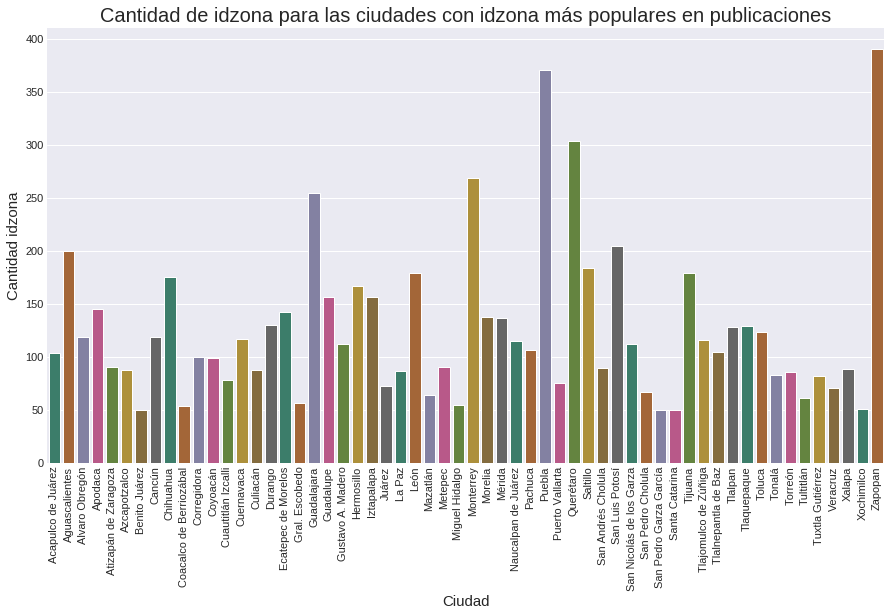

In [274]:
plt.figure(figsize = (15, 8))
sns.barplot(data = ciudadVSidzonaFil, x = 'ciudad', y = 'idzona_count', palette = 'Dark2', saturation = 0.5)
plt.title('Cantidad de idzona para las ciudades con idzona más populares en publicaciones', fontsize = 20)
plt.ylabel('Cantidad idzona', fontsize = 15)
plt.xlabel('Ciudad', fontsize = 15)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

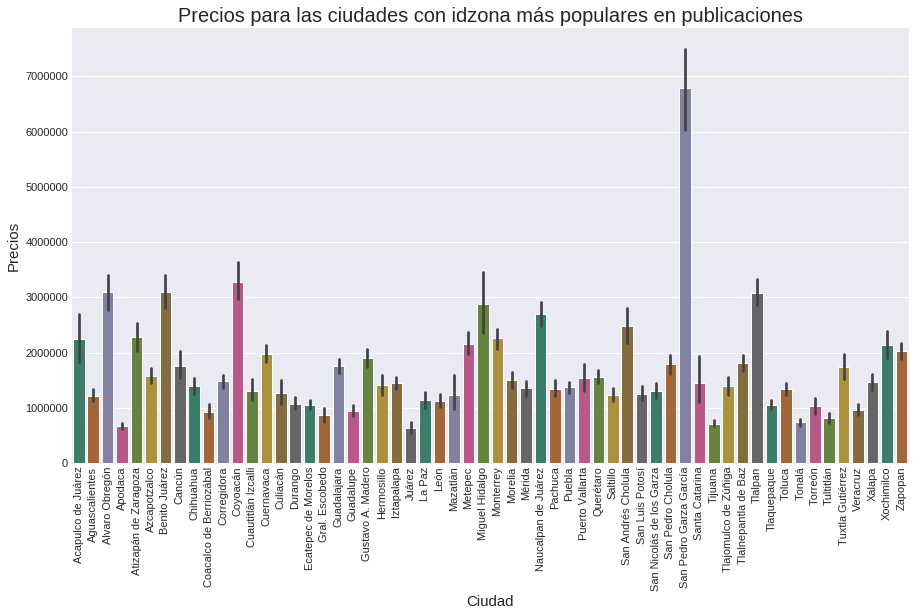

In [275]:
plt.figure(figsize = (15, 8))
sns.barplot(data = ciudadVSidzonaFil, x = 'ciudad', y = 'precio', saturation = 0.5, palette = 'Dark2')
plt.title('Precios para las ciudades con idzona más populares en publicaciones', fontsize = 20)
plt.ylabel('Precios', fontsize = 15)
plt.xlabel('Ciudad', fontsize = 15)
plt.xticks(rotation = 90)

**Veo si puedo hacer un único gráfico con los datos de ambos gráficos para visualizar mejor la relación** 

Text(0.5,0,'Cantidad de idzonas por ciudad')

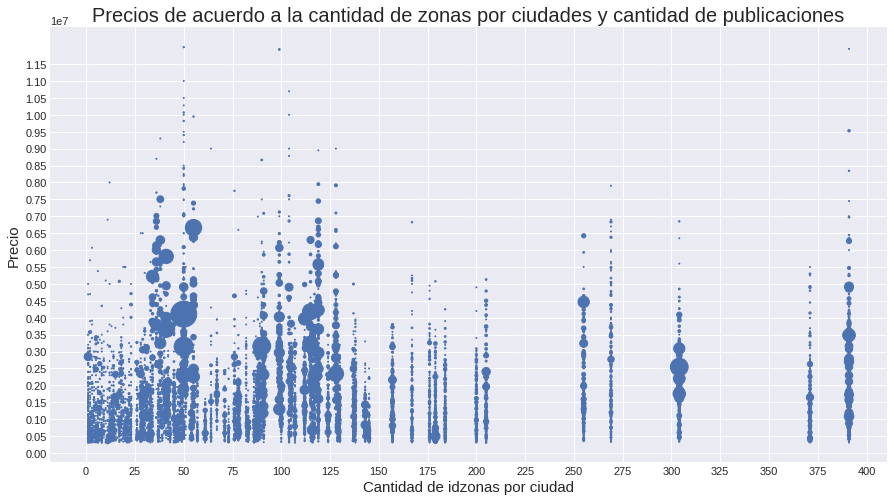

In [311]:
plt.figure(figsize = (15,8))
plt.scatter(x = ciudadVSidzona.idzona_count, y = ciudadVSidzona.precio, s = ciudadVSidzona.id)
plt.yticks(range(0,12000000, 500000))
plt.xticks(range(0,425,25))
plt.title('Precios de acuerdo a la cantidad de zonas por ciudades y cantidad de publicaciones', fontsize = 20)
plt.ylabel('Precio', fontsize = 15)
plt.xlabel('Cantidad de idzonas por ciudad', fontsize = 15)